DATASET: https://www.kaggle.com/datasets/mssmartypants/water-quality

# BUSSINESS UNDERSTANDING

Air memiliki peran penting dalam keberlangsungan hidup manusia, terlebih air mineral adalah hal penting yang wajib untuk dikonsumsi setiap orang nya dalam hari-hari.
Saat ini, banyak kita jumpai merk air mineral yang dijual dipasaran dan dikonsumsi pula orang banyak orang.
Kualitas air menjadi peran penting dalam memproduksi air mineral guna diperjual belikan.

Maka dari itu, perlu dilakukannya pengecekan atau klasifikasi apakah air tersebut aman untuk di konsumsi atau tidak sebelum di produksi menjadi air mineral kemasan.

Model ini dibuat agar mempermudah kalangan perusahaan produksi air mineral guna melakukan klasifikasi apakah air yang mereka dapatkan/sumber air yang mereka gunakan sebagai bahan baku produksi air mineral aman untuk selanjutnya diproses menjadi produk air mineral kemasan atau tidak.

Model ini dibuat menggunakan metode klasifikasi dengan menggunakan algoritma Regresi Linear.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('water.xlsx')

# DATA UNDERSTANDING

Deskripsi:

Semua atribut adalah variabel numerik dari nilai kandungan setiap kolomnya dan tercantum di bawah ini:

aluminium - berbahaya jika lebih besar dari 2,8

ammonia - berbahaya jika lebih besar dari 32,5

arsenic - berbahaya jika lebih besar dari 0,01

barium - berbahaya jika lebih besar dari 2

cadmium - berbahaya jika lebih besar dari 0,005

chloramine - berbahaya jika lebih besar dari 4

chromium - berbahaya jika lebih besar dari 0,1

copper - berbahaya jika lebih besar dari 1,3

flouride - berbahaya jika lebih besar dari 1,5

bacteria - berbahaya jika lebih besar dari 0

is_safe - kualitas air dengan atribut kelas {0 - tidak aman, 1 - aman}

In [3]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,is_safe
0,165,908.0,4,285,7,35,83,17,5,2,1.0
1,232,2116.0,1,331,2,528,68,66,9,65,1.0
2,101,1402.0,4,58,8,424,53,2,99,5,0.0
3,136,1133.0,4,296,1,723,3,166,108,71,1.0
4,92,2433.0,3,2,6,267,69,57,61,13,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aluminium   7999 non-null   int64  
 1   ammonia     7996 non-null   float64
 2   arsenic     7999 non-null   int64  
 3   barium      7999 non-null   int64  
 4   cadmium     7999 non-null   int64  
 5   chloramine  7999 non-null   int64  
 6   chromium    7999 non-null   int64  
 7   copper      7999 non-null   int64  
 8   flouride    7999 non-null   int64  
 9   bacteria    7999 non-null   int64  
 10  is_safe     7996 non-null   float64
dtypes: float64(2), int64(9)
memory usage: 687.5 KB


In [5]:
df.shape

(7999, 11)

In [6]:
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'is_safe'],
      dtype='object')

In [7]:
df['is_safe'].value_counts()

0.0    7084
1.0     912
Name: is_safe, dtype: int64

In [8]:
df['is_safe'].unique()

array([ 1.,  0., nan])

# DATA PREPROSESSING

In [9]:
df.isnull().sum()

aluminium     0
ammonia       3
arsenic       0
barium        0
cadmium       0
chloramine    0
chromium      0
copper        0
flouride      0
bacteria      0
is_safe       3
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

aluminium     0
ammonia       0
arsenic       0
barium        0
cadmium       0
chloramine    0
chromium      0
copper        0
flouride      0
bacteria      0
is_safe       0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df['is_safe'].value_counts()

0.0    7084
1.0     912
Name: is_safe, dtype: int64

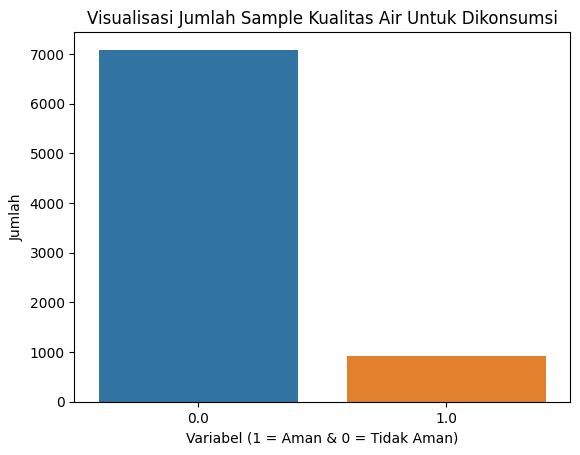

In [14]:
# Plot the count values
sns.countplot(x='is_safe', data=df)

# Customize the plot
plt.title('Visualisasi Jumlah Sample Kualitas Air Untuk Dikonsumsi')
plt.xlabel('Variabel (1 = Aman & 0 = Tidak Aman)')
plt.ylabel('Jumlah')

# Display the plot
plt.show()

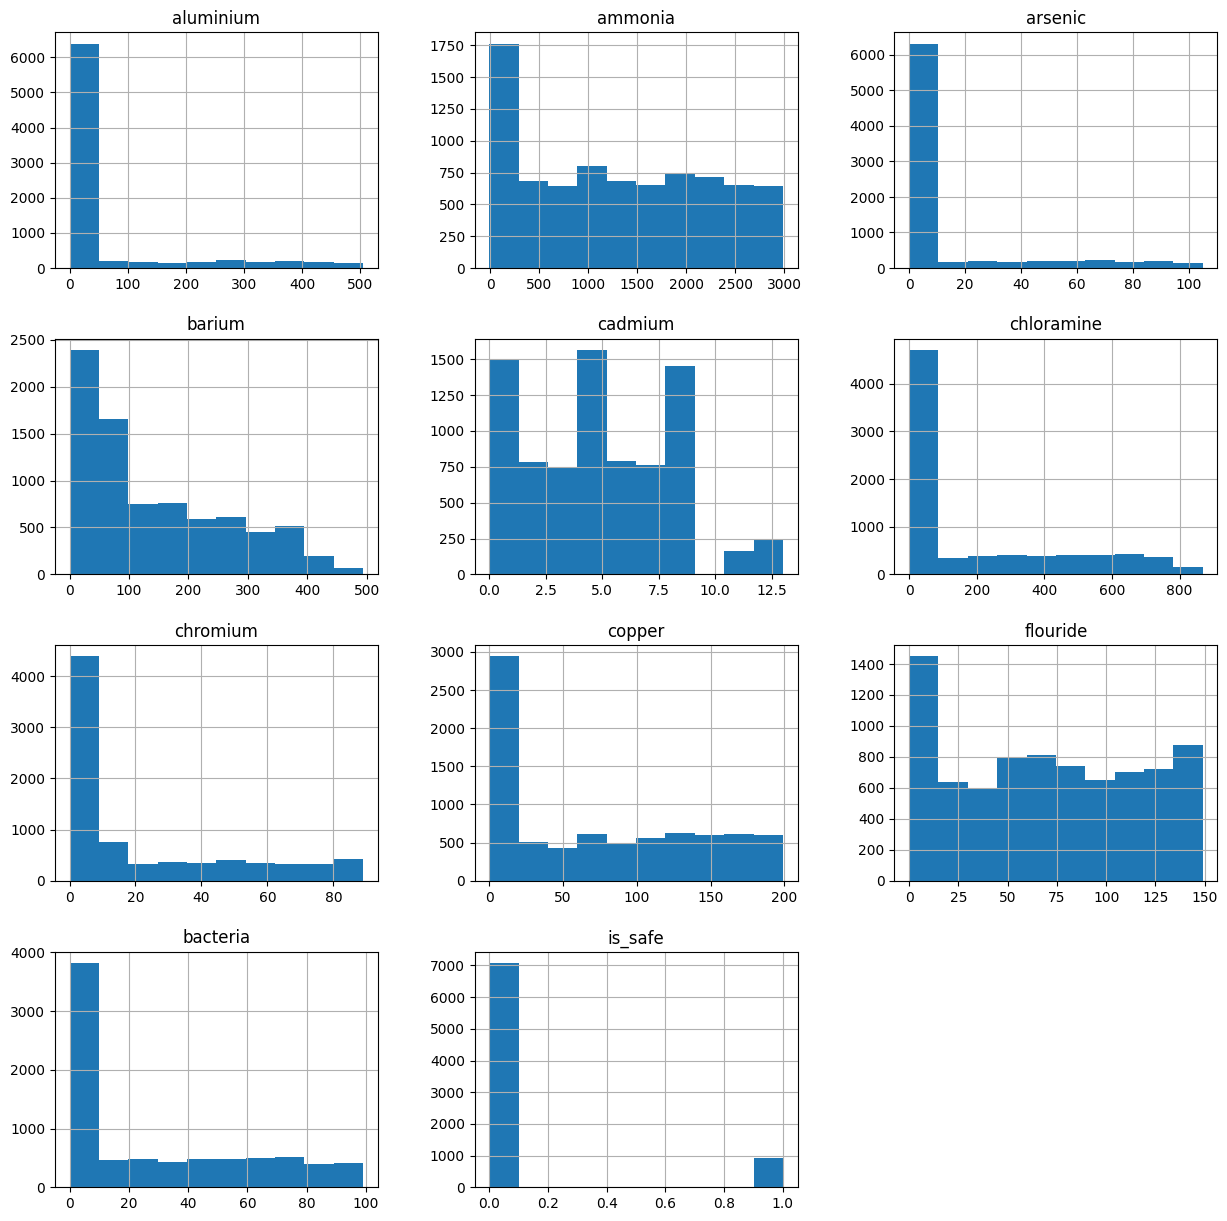

In [15]:
#distribution of the data
df.hist(figsize=(15, 15))
plt.show()

# MODELLING

In [16]:
X = df.drop(columns='is_safe', axis=1)
Y = df['is_safe']

In [17]:
print(X)

      aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0           165    908.0        4     285        7          35        83   
1           232   2116.0        1     331        2         528        68   
2           101   1402.0        4      58        8         424        53   
3           136   1133.0        4     296        1         723         3   
4            92   2433.0        3       2        6         267        69   
...         ...      ...      ...     ...      ...         ...       ...   
7994          5    778.0        0     195        4           1         3   
7995          5   2422.0        2      59        1          45         2   
7996          9    685.0        0      61        3           5         5   
7997          1     10.0        1       2        0           2         0   
7998          4    685.0        1       7        3           5         1   

      copper  flouride  bacteria  
0         17         5         2  
1         66     

In [18]:
print(Y)

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
7994    1.0
7995    1.0
7996    1.0
7997    1.0
7998    1.0
Name: is_safe, Length: 7996, dtype: float64


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, stratify=Y, random_state=2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(7996, 10) (4797, 10) (3199, 10)


In [21]:
model = LogisticRegression()

In [22]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [24]:
print("Akurasi data training : ", training_data_accuracy)

Akurasi data training :  0.8895142797581822


In [25]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [26]:
print("Akurasi data testing : ", testing_data_accuracy)

Akurasi data testing :  0.8937167864957799


In [27]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,is_safe
0,165,908.0,4,285,7,35,83,17,5,2,1.0
1,232,2116.0,1,331,2,528,68,66,9,65,1.0
2,101,1402.0,4,58,8,424,53,2,99,5,0.0
3,136,1133.0,4,296,1,723,3,166,108,71,1.0
4,92,2433.0,3,2,6,267,69,57,61,13,1.0


# EVALUATION

In [28]:
input_data = (232,2116.0,1,331,2,528,68,66,9,65) # 1

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if prediction == 0:
    print('Air Tidak Aman Untuk Dikonsumsi')
else:
    print('Air Aman Untuk Dikonsumsi')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[1.]
Air Aman Untuk Dikonsumsi


# DEPLOYMENT

In [29]:
import pickle

In [31]:
filename = 'water_model.sav'
pickle.dump(model, open(filename, 'wb'))